# Predicting Abalone age

The purpose of this notebook is to create a model that predicts the age of an abalone from its physical characterstics as accurately as possible.

Data: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Abalone)

## Import Data

In [17]:
# Import libraries
import os
import sys

# Update path for notebook location
sys.path[0] = "../"

from urllib.request import urlretrieve, urlopen

from IPython.display import display, HTML # Display functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette("colorblind") 
sns.set_style("darkgrid")

# Set Pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [35]:
# Set remote URL for retrieval
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/'

# Set filenames
filename = 'abalone.data'
names = 'abalone.names'

# Download raw data
urlretrieve(URL + filename, '../data/raw/' + filename);

# Download column names
urlretrieve(URL + names, '../data/raw/' + names);

In [57]:
# Read in names from text file
with open('../data/raw/abalone.names', 'r') as names:
    lines = list(names)

# Names - for now use this list
names = ['Sex', 'Length', 'Diameter', 'Height', 'WeightWhole', 
         'WeightShucked', 'WeightViscera', 'WeightShell', 'RingCount']

# Read in data
raw = pd.read_csv('../data/raw/abalone.data', names=names, header=None, sep=',');

In [59]:
raw.head()

,Sex,Length,Diameter,Height,WeightWhole,WeightShucked,WeightViscera,WeightShell,RingCount
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## EDA

In [60]:
raw.shape

(4177, 9)

In [61]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex              4177 non-null object
Length           4177 non-null float64
Diameter         4177 non-null float64
Height           4177 non-null float64
WeightWhole      4177 non-null float64
WeightShucked    4177 non-null float64
WeightViscera    4177 non-null float64
WeightShell      4177 non-null float64
RingCount        4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


The dataset has no missing information or incorrect datatypes.

### Categorical Features

#### Sex

Sex is the only categorical variable. It has 3 classes: 
- M: male
- F: female
- I: infant

In [104]:
# Convert dtype to category
assert (raw['Sex'].dtype == 'category') | (raw['Sex'].dtype == 'object'), "dtype must be 'category' or 'object'."

Examine distribution:

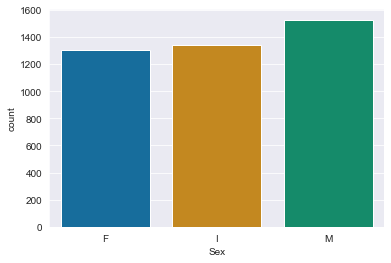

In [80]:
sns.countplot(x="Sex", data=raw);

There are 3 categories in the Sex column and the classes appear to be adequately balanced.

### Continuous Numeric Features

In [109]:
# Selecting 
raw_numeric_cont = raw.select_dtypes(include='float64')
raw_numeric_cont.head()

,Length,Diameter,Height,WeightWhole,WeightShucked,WeightViscera,WeightShell
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


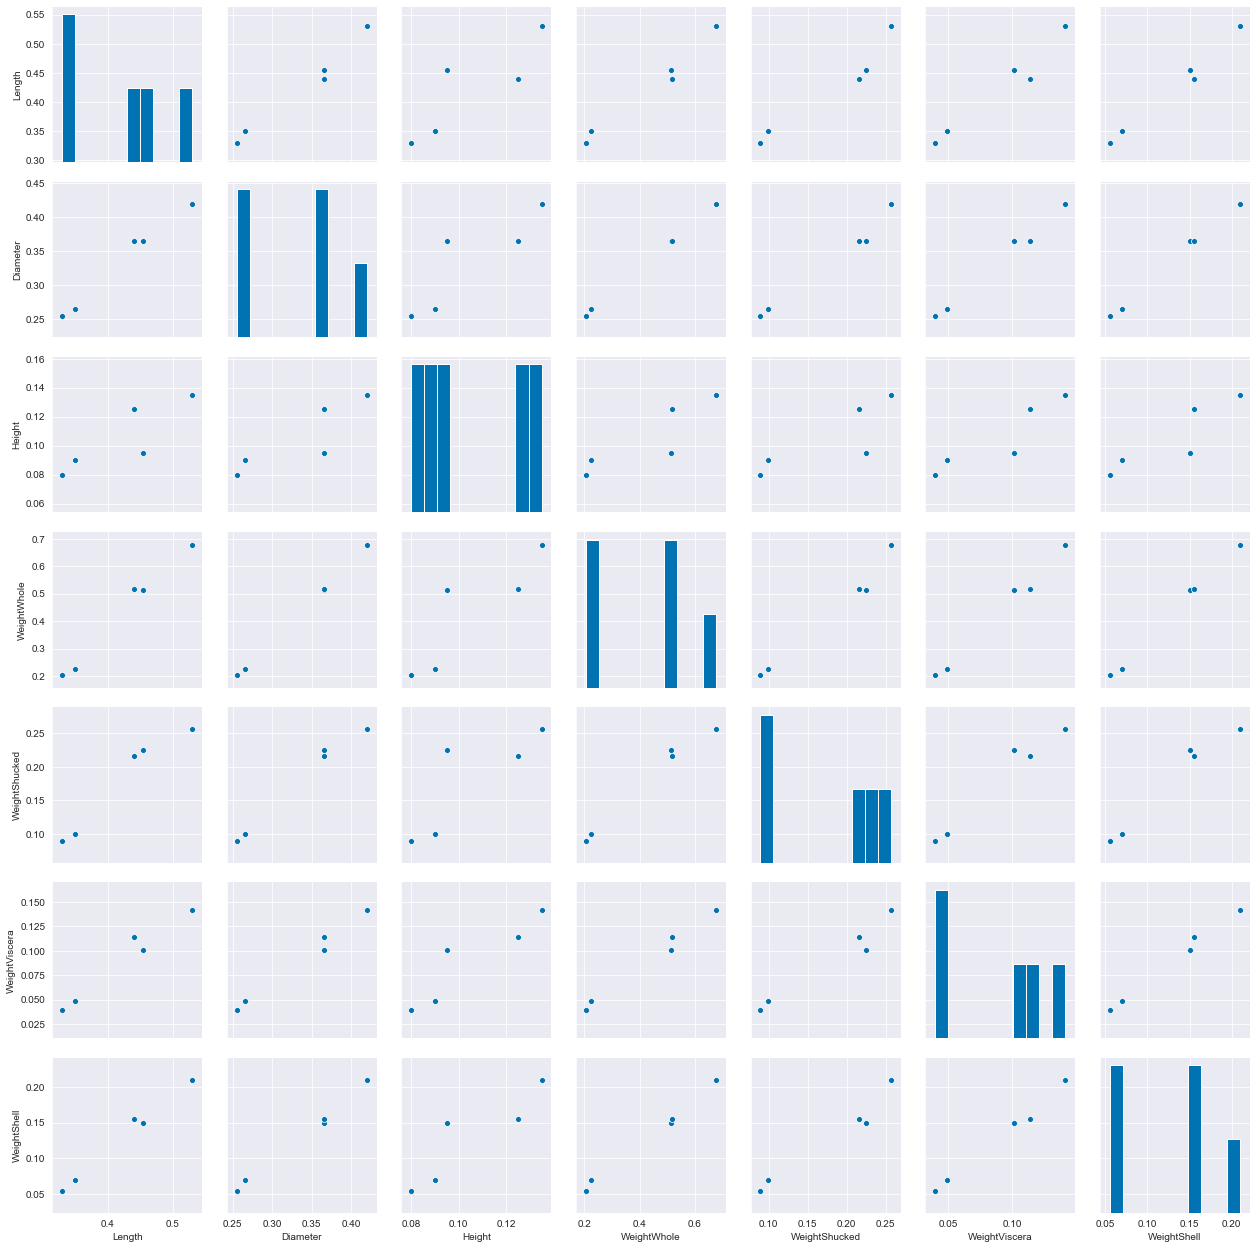

In [110]:
# Pairplots all continuous numeric features
sns.pairplot(raw_numeric);

### Discrete Numeric Features

In [107]:
raw.select_dtypes(include='int').head()

,RingCount
0,15
1,7
2,9
3,10
4,7
